In [20]:
# LinearRegression_norm.ipynb
# データの読み込み
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# モデルの学習
lr = LinearRegression()
lr.fit(x_train, y_train)

# 回帰モデルの学習
lr.fit(x_train, y_train)
print('Coefficients = ', lr.coef_)  # 重回帰の係数
print('Intercept = ', lr.intercept_)  # 切片

no_norm = lr.coef_

# モデルの評価
y_pred = lr.predict(x_test)  # モデルから予測
mse = mean_squared_error(y_test, y_pred)
print("RMSE : %.2f" % (mse ** 0.5))


Coefficients =  [-1.19997513e-01  5.70003304e-02  3.98379660e-03  4.12698187e+00
 -2.05002963e+01  3.38024903e+00  7.56807584e-03 -1.71189793e+00
  3.34747537e-01 -1.17797225e-02 -9.02318039e-01  8.71912756e-03
 -5.55842510e-01]
Intercept =  40.2936705805768
RMSE : 4.82


In [18]:
ridge = Ridge(alpha=1.0)  # リッジ回帰モデルのインスタンスを作成
ridge.fit(x_train, y_train)  # リッジ回帰モデルの学習
ridge_coefs = ridge.coef_  # 係数の取得


In [21]:
lasso = Lasso(alpha=1.0)  # ラッソ回帰モデルのインスタンスを作成
lasso.fit(x_train, y_train)  # ラッソ回帰モデルの学習
lasso_coefs = lasso.coef_  # 係数の取得


In [22]:
#リッジ回帰


# リッジ回帰モデルの評価
y_pred = ridge.predict(x_test)  # モデルから予測
mse = mean_squared_error(y_test, y_pred)
print("リッジ回帰RMSE : %.2f" % (mse ** 0.5))

#ラッソ回帰


# ラッソ回帰モデルの評価
y_pred = lasso.predict(x_test)  # モデルから予測
mse = mean_squared_error(y_test, y_pred)
print("ラッソ回帰RMSE : %.2f" % (mse ** 0.5))


リッジ回帰RMSE : 4.75
ラッソ回帰RMSE : 5.08


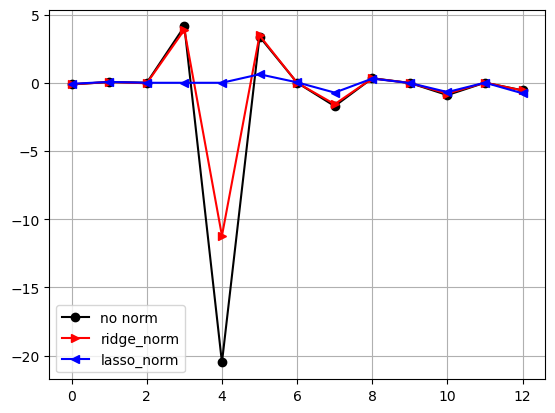

In [23]:
import matplotlib.pyplot as plt
plt.plot(lr.coef_, marker="o", color="black", label="no norm")
plt.plot(ridge.coef_, marker=">", color="red", label="ridge_norm")
plt.plot(lasso.coef_, marker="<", color="blue", label="lasso_norm")

plt.grid()
plt.legend()
plt.show()


# 2


In [24]:
# NeuralNetwork_MNIST_WeightDecay.ipynb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.datasets import mnist
from sklearn.neural_network import MLPClassifier


#MNIST手書き数字画像
datasets = mnist.load_data()
(x_train, y_train), (x_test, y_test) = datasets

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

x_train = x_train/255
x_test = x_test/255

x_train_flatten = np.empty([len(x_train), 28*28])
x_test_flatten = np.empty([len(x_test), 28*28])

for i in range(len(x_train)):
    x_train_flatten[i] = x_train[i].flatten()
for i in range(len(x_test)):
    x_test_flatten[i] = x_test[i].flatten()

#Y_train = np.eye(10)[y_train]
#Y_test = np.eye(10)[y_test]

Y_train = y_train
Y_test = y_test


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [7]:
#標準化（各データから平均を引き、標準偏差で割る）
scaler = StandardScaler()  # 標準化（各データから平均を引き、標準偏差で割る）
X_train = scaler.fit_transform(x_train_flatten)
X_test = scaler.fit_transform(x_test_flatten)


In [32]:
nn0 = MLPClassifier(hidden_layer_sizes=(256,256,256,256), activation='relu', solver='sgd',alpha=0.1,validation_fraction=0.5,early_stopping=True,batch_size=256,max_iter=30,verbose=True)
hist = nn0.fit(X_train, Y_train)
# no_norm= hist.validation_scores_
loss_values0 = hist.loss_curve_  # エポックごとの損失値のリスト
accuracy_values0 = hist.score(X_train, Y_train)  # エポックごとの正解率のリスト


Iteration 1, loss = 2.23803067
Validation score: 0.661067
Iteration 2, loss = 1.27658167
Validation score: 0.812300
Iteration 3, loss = 0.81915359
Validation score: 0.860300
Iteration 4, loss = 0.66590626
Validation score: 0.884233
Iteration 5, loss = 0.59056209
Validation score: 0.894700
Iteration 6, loss = 0.54452709
Validation score: 0.905133
Iteration 7, loss = 0.51216756
Validation score: 0.910967
Iteration 8, loss = 0.48837030
Validation score: 0.916233
Iteration 9, loss = 0.46880194
Validation score: 0.919967
Iteration 10, loss = 0.45234316
Validation score: 0.923000
Iteration 11, loss = 0.43880403
Validation score: 0.926633
Iteration 12, loss = 0.42658763
Validation score: 0.928000
Iteration 13, loss = 0.41593967
Validation score: 0.930700
Iteration 14, loss = 0.40651520
Validation score: 0.932233
Iteration 15, loss = 0.39809335
Validation score: 0.933833
Iteration 16, loss = 0.39017265
Validation score: 0.935600
Iteration 17, loss = 0.38296937
Validation score: 0.937200
Iterat

/Users/kazumamiura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
nn = MLPClassifier()
hist = nn.fit(X_train, Y_train)
# L2_norm = hist.validation_scores_
loss_values = hist.loss_curve_  # エポックごとの損失値のリスト
accuracy_values = hist.score(X_train, Y_train)  # エポックごとの正解率のリスト


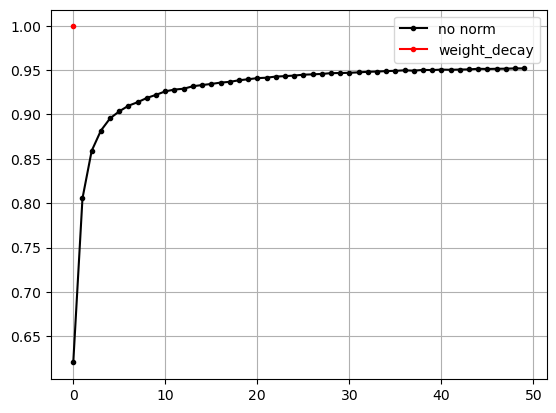

In [36]:
import matplotlib.pyplot as plt
plt.plot(no_norm, marker=".", color="black", label="no norm")
# plt.plot(L2_norm, marker=".", color="red", label="weight_decay")
plt.plot(accuracy_values, marker=".", color="red", label="weight_decay")

plt.grid()
plt.legend()
plt.show()


In [31]:
from sklearn.metrics import accuracy_score
pred = nn0.predict(X_test)
print("荷重減衰なしの場合のテスト精度：", accuracy_score(Y_test, pred))
pred = nn.predict(X_test)
print("荷重減衰ありの場合のテスト精度：", accuracy_score(Y_test, pred))


荷重減衰なしの場合のテスト精度： 0.9553
荷重減衰ありの場合のテスト精度： 0.9736
